In [ ]:
import random
from scipy import stats

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb

import shap
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_invariants = pd.read_excel('../invariants_generation/invariants_plusminus3.xlsx')

In [ ]:
df_invariants

,weight_edges_vertices,weight_edges,average_degree_connectivity,degree_assortativity,local_efficiency,degree_centrality,average_neighbor_degree,global_efficiency,estrada_index,wiener_index,pagerank,path,label
0,412.062174,149.628251,3.496939,0.420706,0.727208,0.001793,4.531033,0.007454,36526.238035,999999999999999,0.000326,./cells/1_1_0_1058.jpg,1
1,410.902669,148.522532,2.943548,0.390509,0.725901,0.001802,4.556424,0.007481,36991.950052,999999999999999,0.000326,./cells/1_1_0_1060.jpg,1
2,408.647461,148.020870,3.356428,0.408261,0.726291,0.001798,4.544249,0.007474,36737.605203,999999999999999,0.000326,./cells/1_1_0_1629.jpg,1
3,423.025391,153.355440,3.508430,0.391611,0.727110,0.001796,4.540131,0.007474,36699.924944,999999999999999,0.000326,./cells/1_1_0_1679.jpg,1
4,417.525391,150.934102,3.528635,0.387413,0.725808,0.001802,4.554134,0.007487,36893.271657,999999999999999,0.000326,./cells/1_1_0_1784.jpg,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,398.936849,144.078768,3.679291,0.424729,0.725353,0.001803,4.558941,0.007487,36948.546422,999999999999999,0.000326,./cells/108_0_0_9420.jpg,0
3227,396.088867,143.218573,2.934341,0.419994,0.725483,0.001801,4.553640,0.007476,36873.051189,999999999999999,0.000326,./cells/108_0_0_954.jpg,0
3228,389.268880,141.301430,3.107666,0.417599,0.726834,0.001794,4.533062,0.007463,36546.567327,999999999999999,0.000326,./cells/108_0_0_9558.jpg,0
3229,396.065430,143.429565,3.381879,0.426635,0.726177,0.001798,4.545524,0.007472,36723.901850,999999999999999,0.000326,./cells/108_0_0_9688.jpg,0


In [ ]:
df = df_invariants.copy()

In [ ]:
label = df.label

In [ ]:
lst = ['path_', 'label']
df = df.drop(lst, axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3, random_state=42)

In [ ]:
nams = list(X_test.columns)

In [ ]:
def process_graph_attributes(train, test):

	ss = StandardScaler()
	trainCols = ss.fit_transform(train)
	testCols = ss.transform(test)

	return trainCols, testCols

In [ ]:
X_train, X_test = process_graph_attributes(X_train, X_test)

In [ ]:
clf = xgb.XGBClassifier()

clf.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],
            early_stopping_rounds=5, eval_metric=["error", "logloss"])

[0]	validation_0-error:0.21185	validation_0-logloss:0.58281	validation_1-error:0.26392	validation_1-logloss:0.60054
[1]	validation_0-error:0.18266	validation_0-logloss:0.51943	validation_1-error:0.25052	validation_1-logloss:0.55831
[2]	validation_0-error:0.17116	validation_0-logloss:0.47586	validation_1-error:0.25464	validation_1-logloss:0.53178
[3]	validation_0-error:0.16320	validation_0-logloss:0.44412	validation_1-error:0.24948	validation_1-logloss:0.51209
[4]	validation_0-error:0.15613	validation_0-logloss:0.41918	validation_1-error:0.23814	validation_1-logloss:0.50104
[5]	validation_0-error:0.15082	validation_0-logloss:0.40088	validation_1-error:0.24330	validation_1-logloss:0.49479
[6]	validation_0-error:0.14595	validation_0-logloss:0.38547	validation_1-error:0.24227	validation_1-logloss:0.49186
[7]	validation_0-error:0.14286	validation_0-logloss:0.37590	validation_1-error:0.24021	validation_1-logloss:0.48893
[8]	validation_0-error:0.13932	validation_0-logloss:0.36312	validation_1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
clf.get_booster().feature_names = nams

In [ ]:
df_table =pd.DataFrame(clf.get_booster().get_score().items(), columns=['feature','weight_importance'])

In [ ]:
df_table

,feature,weight_importance
0,weight_edges_vertices,115.0
1,weight_edges,62.0
2,average_degree_connectivity,77.0
3,degree_assortativity,84.0
4,local_efficiency,89.0
5,degree_centrality,29.0
6,average_neighbor_degree,29.0
7,global_efficiency,44.0
8,estrada_index,39.0


In [ ]:
nams__ = ['wiener_index', 'pagerank']

for i in nams__:
    df_table = df_table.append({'feature':i}, ignore_index=True)

df_table = df_table.fillna(0)

In [ ]:
def ks_test(df, col, label, sample_size, pvalue):
    group_1 = df[df[label]==1][col]
    group_0 = df[df[label]==0][col]

    group_0 = group_0.values.tolist()
    group_0 = random.sample(group_0, sample_size)
    group_1 = group_1.values.tolist()
    group_1 = random.sample(group_1, sample_size)

    _, pnorm = stats.ks_2samp(group_1, group_0)

    print("stat",_)
    print('p value',pnorm)

    if pnorm <pvalue:
        print("we reject null hypothesis")
    else:
        print("we accept null hypothesis")
    return _

In [ ]:
ks_stat = []
for i in nams:
    ks_stat.append(ks_test(df_invariants, i, "label", 1400, 0.05))

stat 0.23642857142857143
p value 1.006065189088223e-34
we reject null hypothesis
stat 0.2257142857142857
p value 1.1681038543756504e-31
we reject null hypothesis
stat 0.17357142857142857
p value 7.887835270608169e-19
we reject null hypothesis
stat 0.3607142857142857
p value 2.559986407842188e-81
we reject null hypothesis
stat 0.3392857142857143
p value 8.464314643831354e-72
we reject null hypothesis
stat 0.3342857142857143
p value 1.1418998657398085e-69
we reject null hypothesis
stat 0.3457142857142857
p value 1.3756126274459007e-74
we reject null hypothesis
stat 0.33785714285714286
p value 3.4647502661646198e-71
we reject null hypothesis
stat 0.32571428571428573
p value 4.2618521507496127e-66
we reject null hypothesis
stat 0.0
p value 1.0
we accept null hypothesis
stat 0.0
p value 1.0
we accept null hypothesis


In [ ]:
df_table['ks_stat'] = ks_stat

In [ ]:
explainer = shap.Explainer(clf, feature_names=nams)
shap_values = explainer(X_test)

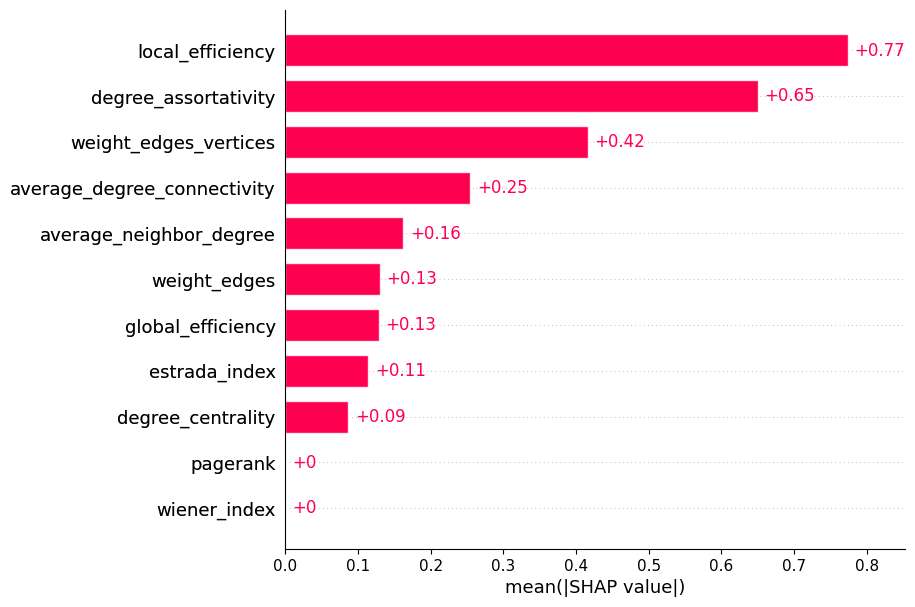

In [ ]:
shap.plots.bar(shap_values, max_display=len(nams))

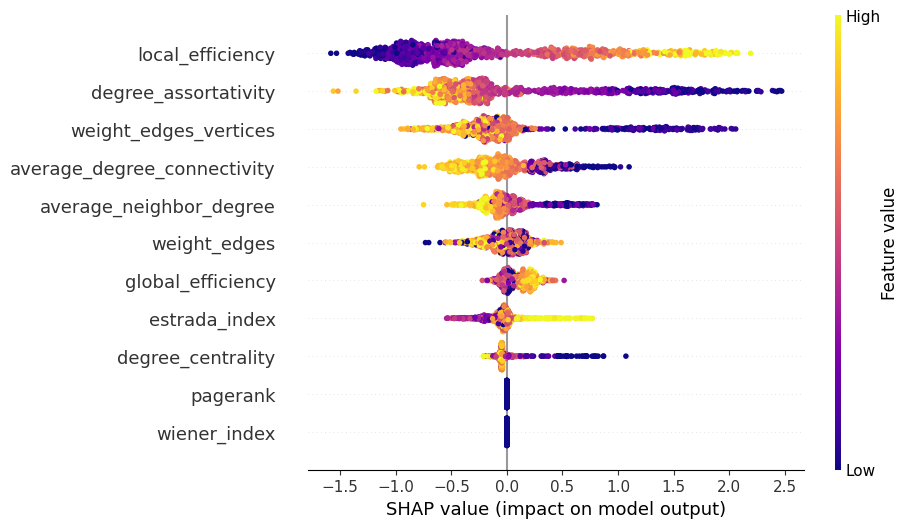

In [ ]:
shap.plots.beeswarm(shap_values, max_display=len(nams),color=plt.get_cmap("plasma"))

In [ ]:
shap_val = abs(shap_values.values).mean(axis=0)
shap_val

array([0.4162009 , 0.12979655, 0.25453305, 0.64975804, 0.77374053,
       0.08664687, 0.1625142 , 0.12865597, 0.11438034, 0.        ,
       0.        ], dtype=float32)

In [ ]:
df_table['mean_shap_values'] = shap_val

In [ ]:
df_table

,feature,weight_importance,ks_stat,mean_shap_values
0,weight_edges_vertices,115.0,0.236429,0.416201
1,weight_edges,62.0,0.225714,0.129797
2,average_degree_connectivity,77.0,0.173571,0.254533
3,degree_assortativity,84.0,0.360714,0.649758
4,local_efficiency,89.0,0.339286,0.773741
5,degree_centrality,29.0,0.334286,0.086647
6,average_neighbor_degree,29.0,0.345714,0.162514
7,global_efficiency,44.0,0.337857,0.128656
8,estrada_index,39.0,0.325714,0.114380
9,wiener_index,0.0,0.000000,0.000000


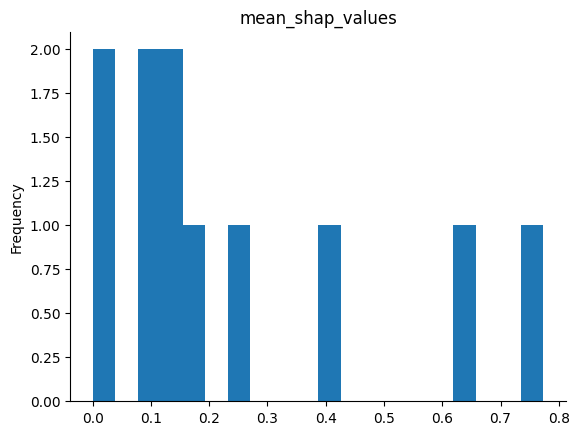

In [ ]:
df_table['mean_shap_values'].plot(kind='hist', bins=20, title='mean_shap_values')
plt.gca().spines[['top', 'right',]].set_visible(False)

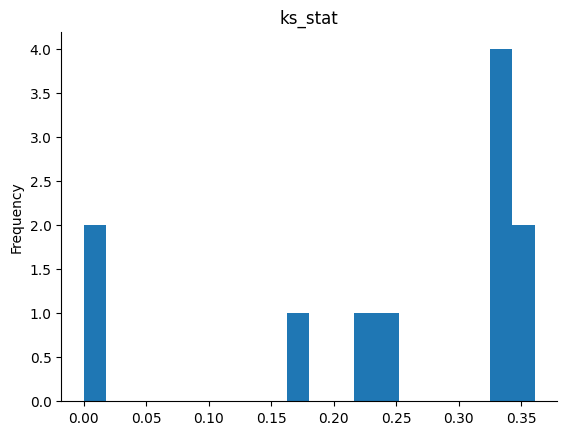

In [ ]:
df_table['ks_stat'].plot(kind='hist', bins=20, title='ks_stat')
plt.gca().spines[['top', 'right',]].set_visible(False)

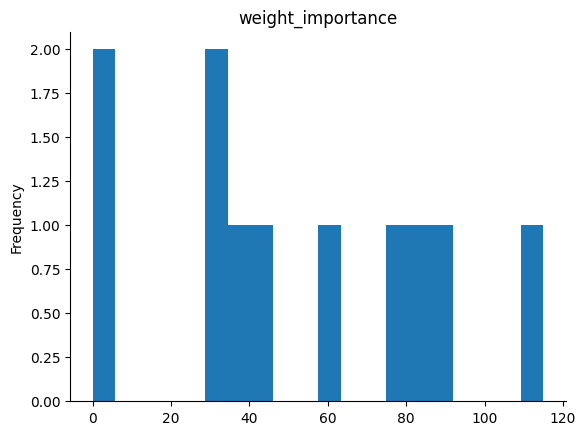

In [ ]:
df_table['weight_importance'].plot(kind='hist', bins=20, title='weight_importance')
plt.gca().spines[['top', 'right',]].set_visible(False)